# Machine Learning for Percieved Wine Quality Assessment
By Sara Chan

## Problem Statement:
The wine industry lacks scalable, objective tools to support sensory evaluations during certification. This study seeks to build predictive models of wine taste preferences using standard chemical test results, enabling more consistent quality control and targeted production adjustments. 

To address this gap, Cortez et al. (2009) modeled wine taste preferences using physicochemical properties and applied three regression-based machine learning techniques: multiple regression (MR), neural networks (NN), and support vector machines (SVM). Their results showed that SVM outperformed the other models in predicting sensory scores of Portuguese Vinho Verde wines.

Building on this work, the present study explores whether Random Forest regression, an ensemble-based technique known for its robustness and interpretability, can further improve predictive accuracy and feature insights. By comparing Random Forest performance to the original models, this research aims to determine whether it offers a more effective and scalable approach for modeling wine preferences from chemical attributes — with implications for quality control, production optimization, and decision support in the wine industry.

## Importing Packages

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


## Importing the dataset 

Dataset: https://archive.ics.uci.edu/dataset/186/wine+quality 

Wine Types: Vinho Verde red and white (Portugal)

Sample Size:

- Red wine: 1,599 samples.
- White wine: 4,898 samples.



Features: 

1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality (score between 0 and 10)

In [5]:
red = pd.read_csv('/Users/sarachan/Desktop/Full Time/Projects/wine+quality/winequality-red.csv', sep=';')
red['type'] = 0 #red wine is denoted as 0 
white = pd.read_csv('/Users/sarachan/Desktop/Full Time/Projects/wine+quality/winequality-white.csv', sep=';')
white['type'] = 1 #white wine is denoted as 1 

In [6]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [7]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


## Exploratory Data Analysis

### Data Overview, Structure and Quality

In [8]:
red.shape, white.shape

((1599, 13), (4898, 13))

In [9]:
red.dtypes, white.dtypes

(fixed acidity           float64
 volatile acidity        float64
 citric acid             float64
 residual sugar          float64
 chlorides               float64
 free sulfur dioxide     float64
 total sulfur dioxide    float64
 density                 float64
 pH                      float64
 sulphates               float64
 alcohol                 float64
 quality                   int64
 type                      int64
 dtype: object,
 fixed acidity           float64
 volatile acidity        float64
 citric acid             float64
 residual sugar          float64
 chlorides               float64
 free sulfur dioxide     float64
 total sulfur dioxide    float64
 density                 float64
 pH                      float64
 sulphates               float64
 alcohol                 float64
 quality                   int64
 type                      int64
 dtype: object)

In [10]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.0
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.0
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.0
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.0
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.0
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.0
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,0.0


In [11]:
red['quality'].nunique(), white['quality'].nunique()

(6, 7)

In [12]:
red.isnull().sum(), red.isna().sum()

(fixed acidity           0
 volatile acidity        0
 citric acid             0
 residual sugar          0
 chlorides               0
 free sulfur dioxide     0
 total sulfur dioxide    0
 density                 0
 pH                      0
 sulphates               0
 alcohol                 0
 quality                 0
 type                    0
 dtype: int64,
 fixed acidity           0
 volatile acidity        0
 citric acid             0
 residual sugar          0
 chlorides               0
 free sulfur dioxide     0
 total sulfur dioxide    0
 density                 0
 pH                      0
 sulphates               0
 alcohol                 0
 quality                 0
 type                    0
 dtype: int64)

In [13]:
white.isnull().sum(), white.isna().sum()

(fixed acidity           0
 volatile acidity        0
 citric acid             0
 residual sugar          0
 chlorides               0
 free sulfur dioxide     0
 total sulfur dioxide    0
 density                 0
 pH                      0
 sulphates               0
 alcohol                 0
 quality                 0
 type                    0
 dtype: int64,
 fixed acidity           0
 volatile acidity        0
 citric acid             0
 residual sugar          0
 chlorides               0
 free sulfur dioxide     0
 total sulfur dioxide    0
 density                 0
 pH                      0
 sulphates               0
 alcohol                 0
 quality                 0
 type                    0
 dtype: int64)

In [47]:
wine = pd.concat([red,white], axis = 0)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


### Feature Analysis 

In [15]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


<AxesSubplot:>

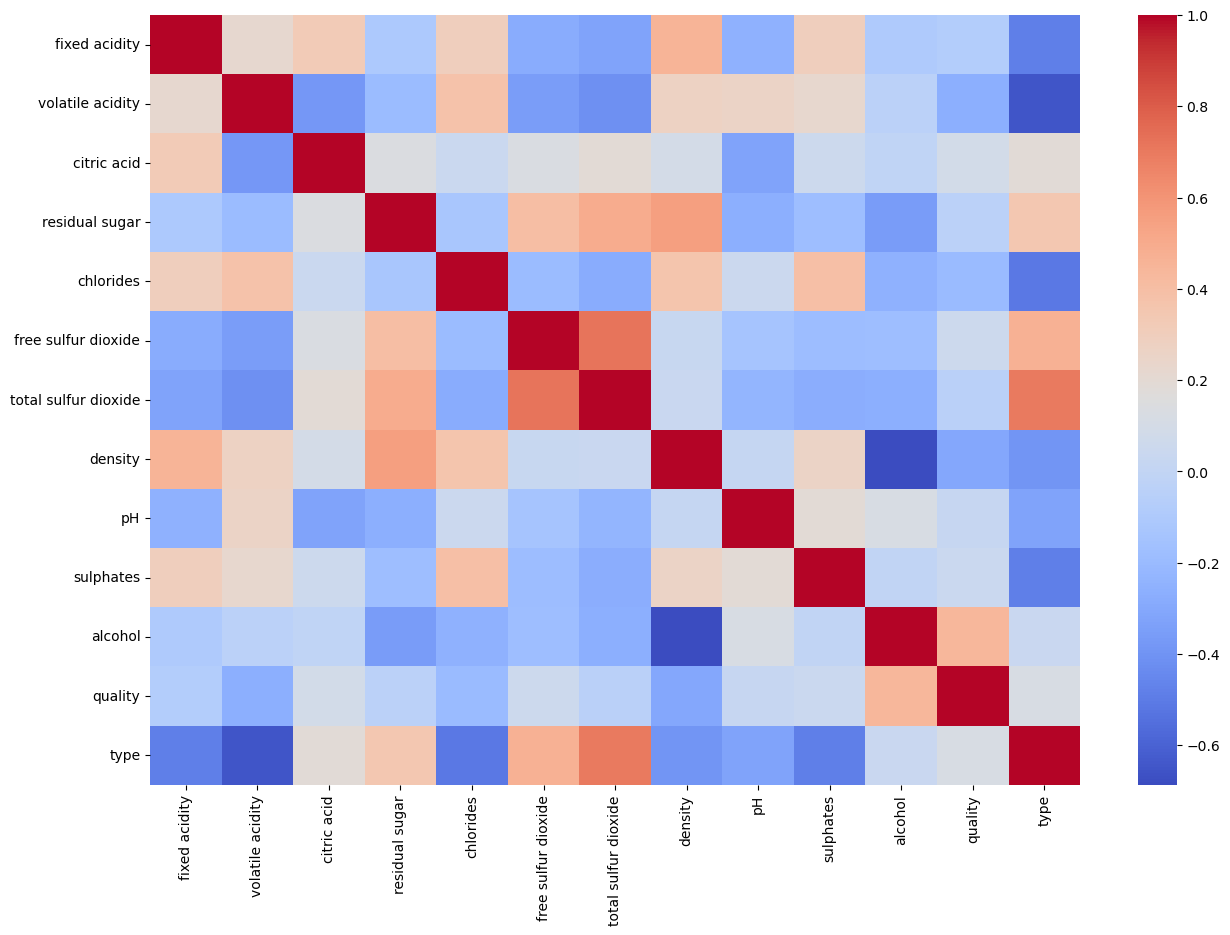

In [16]:
#buidling heatmap
plt.figure(figsize=(15,10))
sns.heatmap(wine.corr(), cmap='coolwarm')

In [17]:
#Dropping highly correlated variables - in this case total sulfur dioxide
wine_new = wine.drop('total sulfur dioxide',axis=1)

Alcohol appears to be the strongest quality predictor - I'll focus on this feature. 

Multicollinearity concerns: Sulfur dioxide variables and density-related features may need dimensionality reduction. Wine type creates distinct chemical profiles - consider separate models or strong interaction terms. 
Quality prediction challenges: Relatively weak correlations suggest quality depends on complex feature interactions rather than single variables

The most actionable insight is that alcohol content and volatile acidity control are the primary drivers of perceived wine quality.

In [18]:
wine.skew()

fixed acidity           1.723290
volatile acidity        1.495097
citric acid             0.471731
residual sugar          1.435404
chlorides               5.399828
free sulfur dioxide     1.220066
total sulfur dioxide   -0.001177
density                 0.503602
pH                      0.386839
sulphates               1.797270
alcohol                 0.565718
quality                 0.189623
type                   -1.179095
dtype: float64

In [19]:
wine.kurtosis()

fixed acidity            5.061161
volatile acidity         2.825372
citric acid              2.397239
residual sugar           4.359272
chlorides               50.898051
free sulfur dioxide      7.906238
total sulfur dioxide    -0.371664
density                  6.606067
pH                       0.367657
sulphates                8.653699
alcohol                 -0.531687
quality                  0.232322
type                    -0.609922
dtype: float64

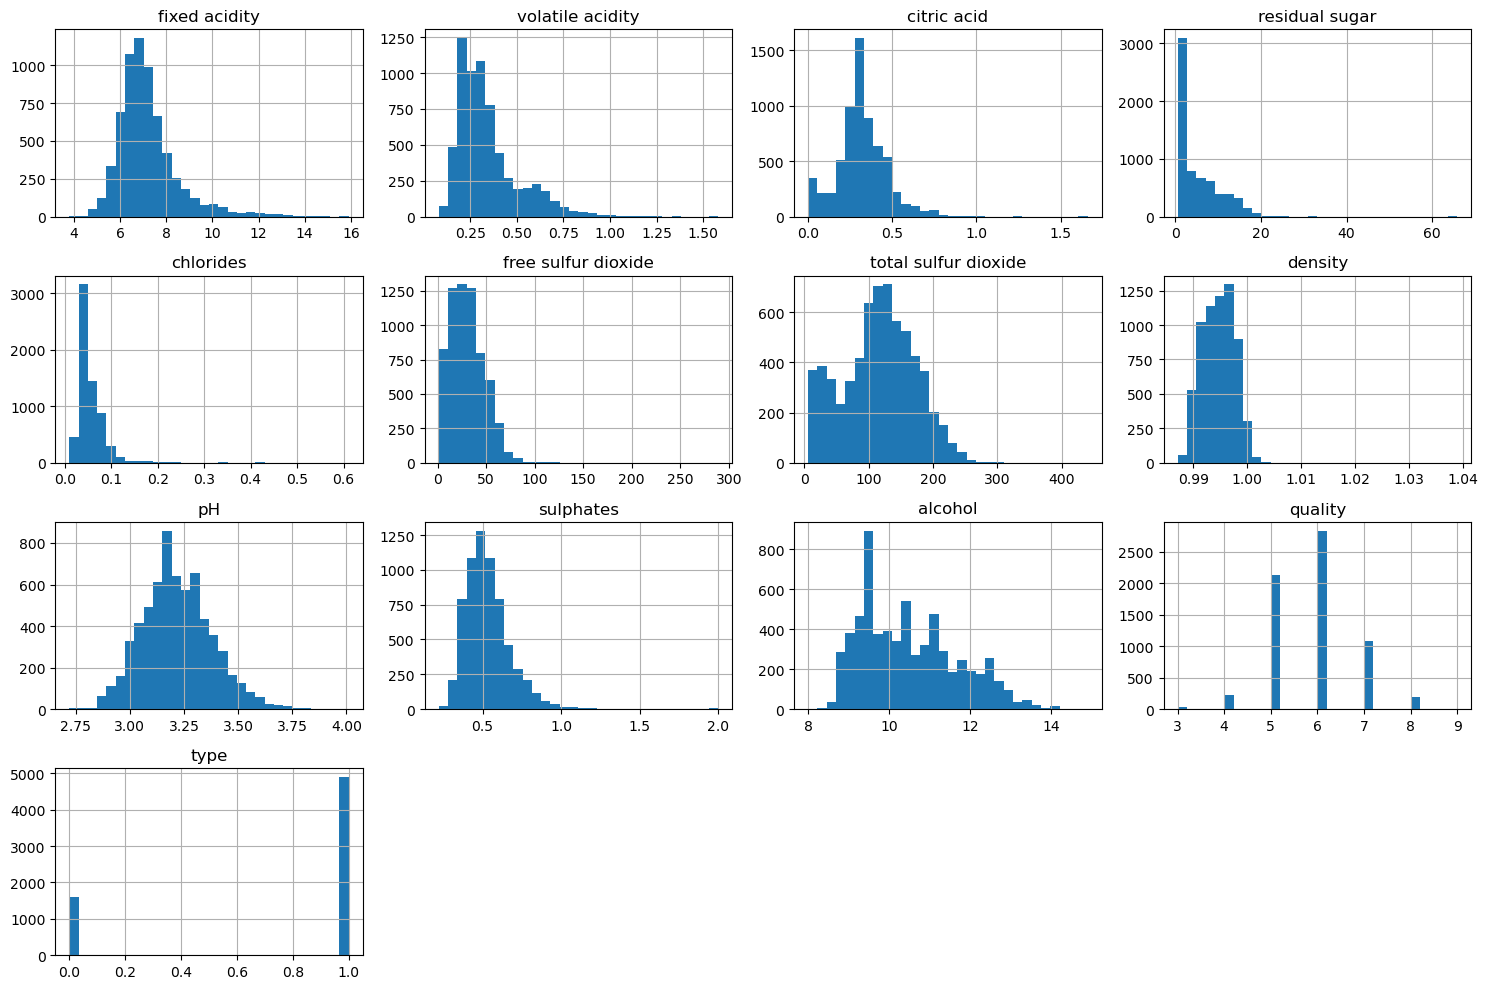

In [20]:
# Histograms for all variables
wine.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

Fixed acidity (1.72, 5.06): Moderately right-skewed with heavy tails, indicating most wines have lower acidity but with notable outliers having very high acidity levels.

Volatile acidity (1.50, 2.83): Moderately right-skewed with some outliers, showing most wines have acceptable volatile acidity with occasional wines having problematically high levels.

Citric acid (0.47, 2.40): Nearly normally distributed with typical outlier patterns, suggesting a well-balanced distribution across the wine samples.

Residual sugar (1.43, 4.36): Right-skewed with heavy tails, indicating most wines are dry with some notably sweet outliers.

Chlorides (5.40, 50.90): Extremely right-skewed with massive outlier presence, suggesting most wines have normal salt levels but some have extraordinarily high chloride content that may indicate data quality issues.



Free sulfur dioxide (1.22, 7.91): Moderately right-skewed with many outliers, showing typical preservation levels for most wines with some having unusually high sulfur dioxide content.

Total sulfur dioxide (-0.001, -0.37): Perfectly symmetric with fewer outliers than normal, indicating a well-controlled and balanced distribution.

Density (0.50, 6.61): Slightly right-skewed but with significant outliers, suggesting mostly consistent wine densities with some unusual samples.

pH (0.39, 0.37): Nearly normal distribution with fewer outliers than expected, indicating well-controlled acidity balance across wines.

Sulphates (1.80, 8.65): Heavily right-skewed with extreme outliers, showing most wines have moderate sulphate levels but some have very high concentrations.

Alcohol (0.57, -0.53): Slightly right-skewed with fewer extreme values than normal, indicating a controlled range of alcohol content with some preference toward moderate levels.

Quality (0.19, 0.23): Nearly normal distribution with light tails, showing a balanced spread of wine ratings with few extremely good or bad wines.

## Model building

I chose to use to a Random Forest model because it can handle complex, nonlinear relationships between chemical properties and quality ratings. It offers high accuracy, robustness to overfitting, and provides interpretable insights into feature importance. This makes it both a practical and interpretable tool for data-driven decision-making in wine analysis. 

In [21]:
# Separate features and target variable
X = wine.drop('quality', axis=1)
y = wine['quality']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the features (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Train the model
rf.fit(X_train_scaled, y_train)



RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [23]:
# Predict on the test set
y_pred = rf.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6876923076923077

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.57      0.09      0.16        43
           5       0.74      0.70      0.72       428
           6       0.65      0.81      0.72       567
           7       0.70      0.56      0.62       216
           8       1.00      0.33      0.50        39
           9       0.00      0.00      0.00         1

    accuracy                           0.69      1300
   macro avg       0.52      0.36      0.39      1300
weighted avg       0.69      0.69      0.67      1300


Confusion Matrix:
 [[  0   0   4   2   0   0   0]
 [  0   4  23  16   0   0   0]
 [  2   2 298 124   2   0   0]
 [  0   1  72 458  36   0   0]
 [  0   0   5  90 121   0   0]
 [  0   0   0  11  15  13   0]
 [  0   0   0   1   0   0   0]]


/Users/sarachan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sarachan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sarachan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


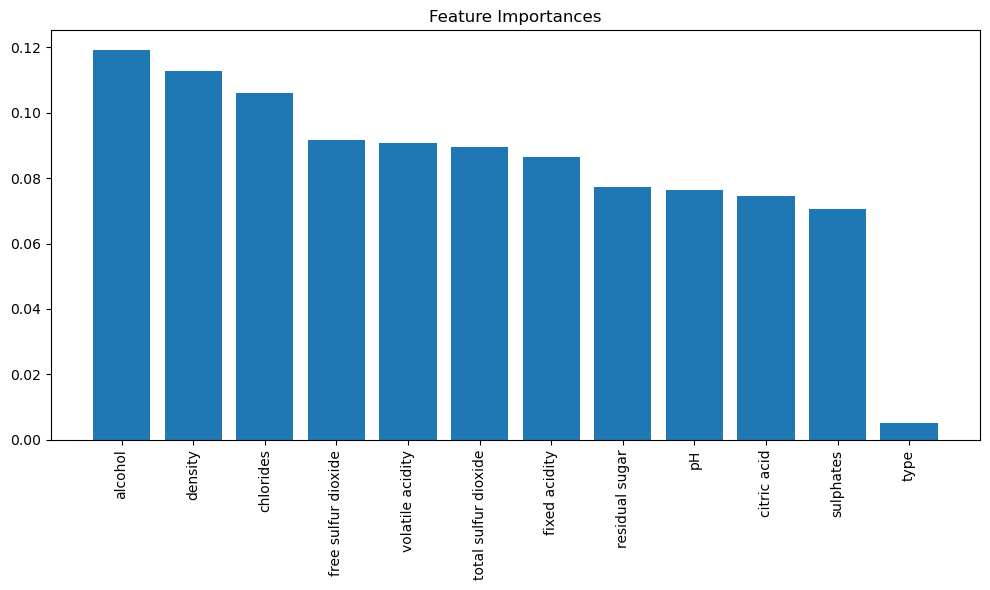

In [24]:
# Plot feature importances
importances = rf.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

To increase model prediction accuracy, I want to investigate feature interaction. 

In [28]:
wine['alcohol_sulphates'] = wine['alcohol'] * wine['sulphates']
wine['alcochol_density'] = wine['alcohol'] * wine['density']
wine['volacid_citricacid'] = wine['volatile acidity'] * wine['citric acid']

In [29]:
wine1 = wine.copy()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,alcohol_sulphates,alcochol_density,volacid_citricacid
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,5.264,9.379320,0.0000
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,6.664,9.768640,0.0000
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,6.370,9.770600,0.0304
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,5.684,9.780400,0.1568
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,5.264,9.379320,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1,5.600,11.100768,0.0609
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1,4.416,9.551040,0.1152
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1,4.324,9.329876,0.0456
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,4.864,12.655232,0.0870


In [62]:
wine1[["alcohol_sulphates", "alcochol_density", "volacid_citricacid"]]


,alcohol_sulphates,alcochol_density,volacid_citricacid
0,5.264,9.379320,0.0000
1,6.664,9.768640,0.0000
2,6.370,9.770600,0.0304
3,5.684,9.780400,0.1568
4,5.264,9.379320,0.0000
...,...,...,...
4893,5.600,11.100768,0.0609
4894,4.416,9.551040,0.1152
4895,4.324,9.329876,0.0456
4896,4.864,12.655232,0.0870


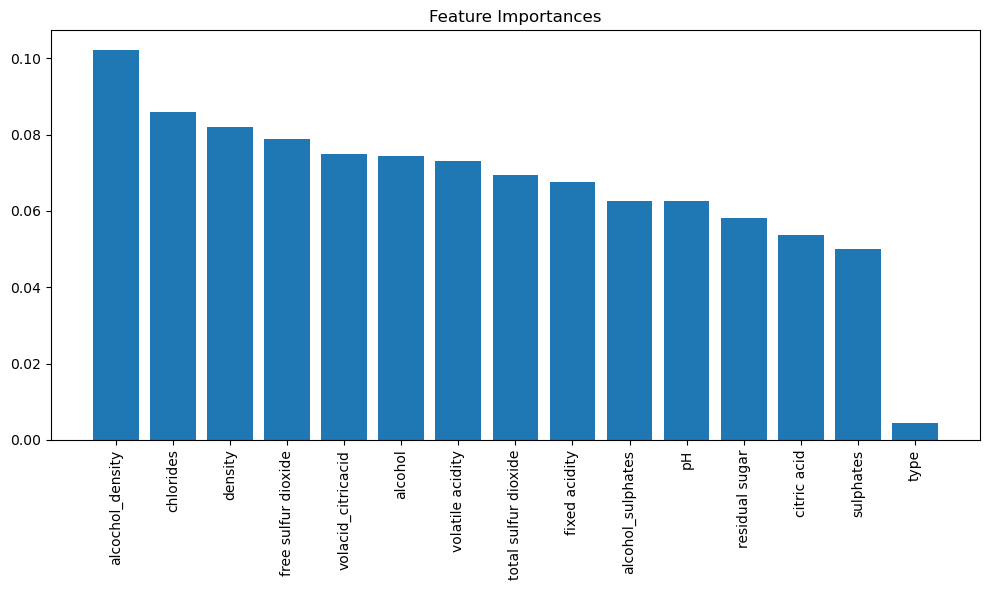

In [43]:

# Plot feature importances
importances = rf.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [63]:
# Separate features and target
X = wine1.drop('quality', axis=1)
y = wine1['quality']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # helps with class imbalance
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)


In [64]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6976923076923077

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.67      0.09      0.16        43
           5       0.76      0.73      0.75       428
           6       0.66      0.81      0.73       567
           7       0.66      0.55      0.60       216
           8       1.00      0.36      0.53        39
           9       0.00      0.00      0.00         1

    accuracy                           0.70      1300
   macro avg       0.54      0.36      0.40      1300
weighted avg       0.70      0.70      0.68      1300



/Users/sarachan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sarachan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sarachan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Application 
By leveraging chemical analysis data, the model provides objective and rapid predictions of wine quality. 

In [70]:
import joblib

# Save the trained model
joblib.dump(rf, 'wine_quality_rf_model.pkl')

# Save the scaler used for preprocessing
joblib.dump(scaler, 'wine_quality_scaler.pkl')

def load_model_and_predict(input_features):
    # Load model and scaler
    rf_loaded = joblib.load('wine_quality_rf_model.pkl')
    scaler_loaded = joblib.load('wine_quality_scaler.pkl')
    
    # Preprocess input (expects a 2D array or DataFrame)
    features_scaled = scaler_loaded.transform(input_features)
    
    # Predict
    predictions = rf_loaded.predict(features_scaled)
    return predictions




In [71]:
# Example new data (replace with your actual new samples)
new_wine_data = np.array([
    [7.4, 0.70, 0.00, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4, 1, 5.264, 0.0, 9.38132]
,  # Sample 1
[7.4, 0.70, 0.00, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4, 1, 5.264, 0.0, 9.38132]])
# Predict quality
predicted_quality = load_model_and_predict(new_wine_data)
print("Predicted wine quality:", predicted_quality)

Predicted wine quality: [5 5]


/Users/sarachan/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In experimenting with model choice, Random Forest was a classifier. I'd be interested in treating the quality scores as continuous variables.  Support Vector Machines (SVMs) outpreformed Neural Networks and Multilinear Regression. It has theoretical advantages over Neural Networks, such as the absence of local minima in the learning phase. 

In [76]:

# Separate features and target
X = wine1.drop("quality", axis=1)
y = wine1["quality"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

# Define SVM and parameter grid
svr = SVR()
param_grid = {
    'C': [1, 10, 100],
    'epsilon': [0.1, 0.5, 1.0],
    'gamma': ['scale', 0.1, 0.01]
}

# Grid search with cross-validation
grid = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'epsilon': [0.1, 0.5, 1.0],
                         'gamma': ['scale', 0.1, 0.01]},
             scoring='neg_mean_absolute_error')

In [77]:

# Best model
best_svr = grid.best_estimator_
print("Best parameters:", grid.best_params_)

# Predict on test set
y_pred = best_svr.predict(X_test)

# Evaluation metrics
mad = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Deviation (MAD): {mad:.3f}")

# Accuracy within tolerance
def accuracy_within_tolerance(y_true, y_pred, tol=0.5):
    return np.mean(np.abs(y_true - y_pred) <= tol)

acc_05 = accuracy_within_tolerance(y_test, y_pred, tol=0.5)
acc_10 = accuracy_within_tolerance(y_test, y_pred, tol=1.0)
print(f"Accuracy (T=0.5): {acc_05:.2%}")
print(f"Accuracy (T=1.0): {acc_10:.2%}")


Best parameters: {'C': 1, 'epsilon': 0.1, 'gamma': 0.1}
Mean Absolute Deviation (MAD): 0.507
Accuracy (T=0.5): 57.16%
Accuracy (T=1.0): 87.27%


# Conclusion




## Key Insights 

1. Alcohol Content is a Major Driver of Quality
Wines with higher alcohol content are more likely to receive higher quality ratings.

This is consistently supported by both your model’s feature importance and wine science literature.

2. Balance of Chemical Properties Matters Most
No single variable (besides alcohol) overwhelmingly determines quality.

Features like sulphates, density, volatile acidity, and chlorides also contribute, but their effects are most pronounced when in balance with each other.

3. Sulphates and Density are Important Predictors
Higher sulphate levels (within a reasonable range) and lower density are associated with better quality.

These features influence mouthfeel, preservation, and structure.

4. Volatile Acidity Should Be Kept Low
Lower volatile acidity is linked to higher quality, as high levels can impart unpleasant, vinegar-like aromas.



For higher quality: I'd recommend: 
1. Controlling alcohol via sugar concentration in grapes,
2. Adjusting sulphates for better aroma,
3. Managing volatile acidity by monitoring lactic bacteria

## Model use: 

1. Streamline quality assurance processes by providing quick, data-driven assessments.

2. Support early identification of quality issues, enabling proactive adjustments during production.

3. Reduce costs and time associated with manual sensory evaluations.

4. Enhance consistency and reliability in quality certification, which is crucial for maintaining brand reputation and meeting regulatory standards